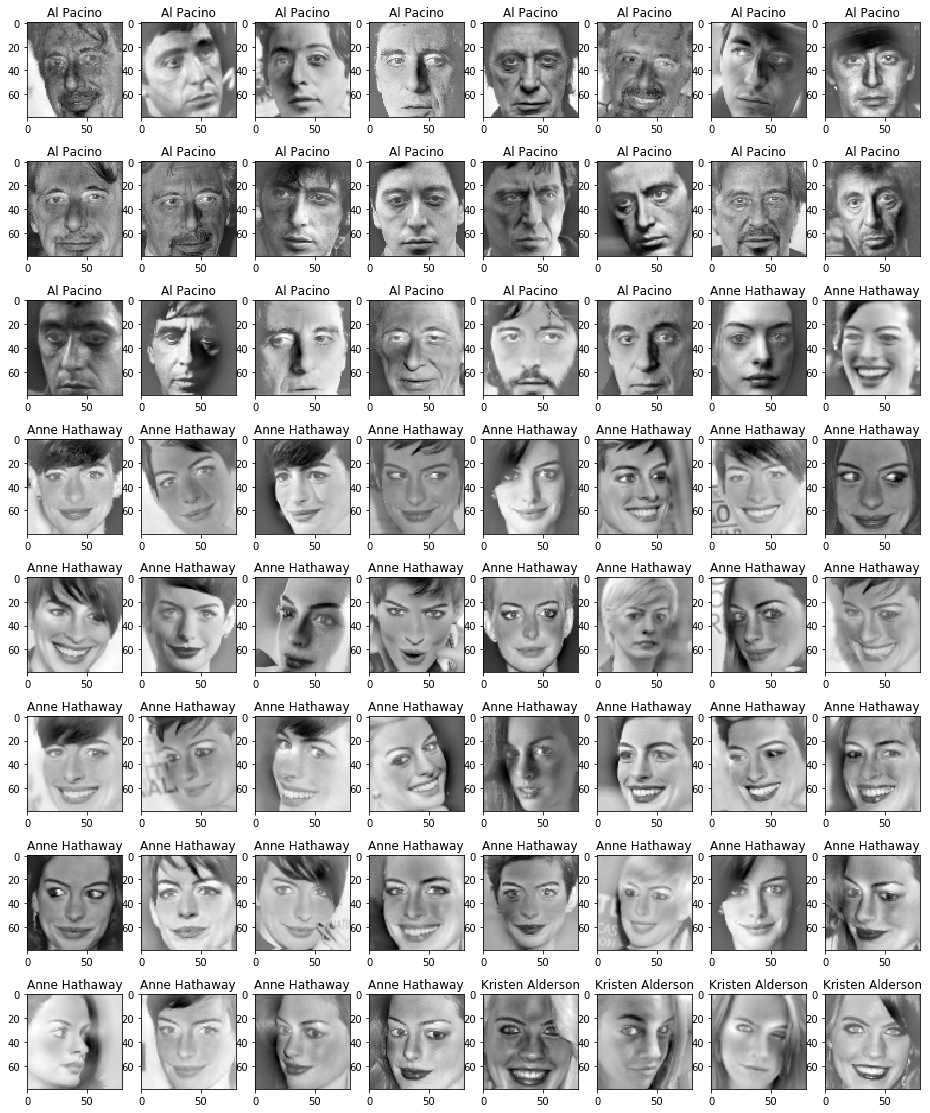

In [14]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.feature import local_binary_pattern as lbp

size = 80

width, height = 8, 8

plt.figure(figsize=(16, 20))
for n, (image, tag) in enumerate(zip(prepared, y_train), 1):
    if n > width * height:
        break
    plt.subplot(height, width, n)
    plt.title(tag)
    plt.imshow(image.reshape((size, size)), cmap='gray')
plt.show()

RESULT OF MY HARD WORK

In [ ]:
from numpy import ones, arctan2, zeros, append, empty, dot
from skimage.filters import sobel_h, sobel_v
from skimage.transform import resize
from sklearn.model_selection import train_test_split
from math import pi

def way(grad):
    if (grad == pi):
        return 8
    return int(9 * grad / pi)

def extract_hog(image):
    #image = 0.299 * img[:, :, 0] + 0.587 * img[:, :, 1] + 0.114 * img[:, :, 2]
    #image = resize(image, (64, 64), mode = 'reflect')
    sobelx = sobel_v(image)
    sobely = sobel_h(image)
    modul_grad = (sobelx ** 2 + sobely ** 2) ** (1 / 2)
    way_grad = abs(arctan2(sobely, sobelx))
    gistogram_places = zeros((10, 10, 9))
    for x in range(10):
        for y in range(10):
            for i in range(8):
                for j in range(8):
                    pixelx = 8 * x + i
                    pixely = 8 * y + j
                    gistogram_places[x, y, way(way_grad[pixelx, pixely])] += modul_grad[pixelx, pixely]
    eps = 0.0000000001
    for x in range(9):
        for y in range(9):
            v = gistogram_places[x, y]
            v = append(v, gistogram_places[x + 1, y])
            v = append(v, gistogram_places[x, y + 1])
            v = append(v, gistogram_places[x + 1, y + 1])
            if ((x == 0) and (y == 0)):
                res = v / ((dot(v, v) + eps) ** (1 / 2))
                created = 0
            else:
                res = append(res, v / ((dot(v, v) + eps) ** (1 / 2)))
    return res

In [ ]:
from sklearn.neighbors import KNeighborsClassifier as KNS
import numpy as np
from scipy.spatial.distance import euclidean
from scipy.spatial import minkowski_distance
from sklearn.metrics import accuracy_score
from skimage.transform import rotate
from sklearn.model_selection import train_test_split

X_train= np.load('x_train.npy')
y_train = np.load('y_train.npy')

def generator(image):
    res = []
    for angle in range(-20, 21, 4):
        res.append(rotate(image, angle, mode = 'reflect'))
    return res

test = np.load('test.npy')
#X_train, test, y_train, test_ans = train_test_split(X_train, y_train, train_size = 0.75)

from sklearn import preprocessing
# normalize the data attributes
X_train = preprocessing.normalize(X_train)
test = preprocessing.normalize(test)
# standardize the data attributes
#X_train = preprocessing.scale(X_train)
#test = preprocessing.scale(test)

eps = 0.0000000001
size = 80
neigh = 1
p = 1.5

x_train = np.empty((X_train.shape[0], 2916))

for i in range(len(X_train)):
    x_train[i] = extract_hog(X_train[i].reshape((size, size)))
X_train = x_train
x_train = 0

print('prepared')

res = []
for n, t_image in enumerate(test, 1):
    voting = dict()
    for prep_img in generator(t_image.reshape((size, size))):
        image = extract_hog(prep_img.reshape((size, size)))
        neigh_nums = dict()
        for i, train_img in enumerate(X_train, 1):
            temp_dist = minkowski_distance(image, train_img, p)
            if (len(neigh_nums) < neigh):
                neigh_nums[-temp_dist] = i - 1
            else:
                for dist in neigh_nums:
                    if (dist < -temp_dist):
                        neigh_nums.pop(dist)
                        neigh_nums[-temp_dist] = i - 1
                    break
        for dist in neigh_nums:
            tag = y_train[neigh_nums[dist]]
            if (voting.get(tag) != None):
                voting[tag] += 1/(-dist + eps)
            else:
                voting[tag] = 1/(-dist + eps)
    max_ = 0
    ans = ""
    for name in voting:
        #print(name, voting[name])
        if (voting[name] > max_):
            ans = name
            max_ = voting[name]
    res.append(ans)
    if (n % 100 == 0):
        print('.', end = '')
#print("\n", neigh, ":", accuracy_score(test_ans, res))

In [ ]:
def saver(path, res):
    with open(path, 'w') as out:
        print('Id,Name', file = out)
        for i in range(len(res)):
            print('{i},{res}'.format(i = i + 1, res=res[i]), file = out)

In [ ]:
saver('second.csv', res)

In [1]:
from numpy import ones, arctan2, zeros, append, empty, dot
from skimage.filters import sobel_h, sobel_v
from skimage.transform import resize
from sklearn.model_selection import train_test_split
from math import pi

def way(grad):
    if (grad == pi):
        return 8
    return int(9 * grad / pi)

def extract_hog(image):
    #image = 0.299 * img[:, :, 0] + 0.587 * img[:, :, 1] + 0.114 * img[:, :, 2]
    #image = resize(image, (64, 64), mode = 'reflect')
    sobelx = sobel_v(image)
    sobely = sobel_h(image)
    modul_grad = (sobelx ** 2 + sobely ** 2) ** (1 / 2)
    way_grad = abs(arctan2(sobely, sobelx))
    gistogram_places = zeros((10, 10, 9))
    for x in range(10):
        for y in range(10):
            for i in range(8):
                for j in range(8):
                    pixelx = 8 * x + i
                    pixely = 8 * y + j
                    gistogram_places[x, y, way(way_grad[pixelx, pixely])] += modul_grad[pixelx, pixely]
    eps = 0.0000000001
    for x in range(9):
        for y in range(9):
            v = gistogram_places[x, y]
            v = append(v, gistogram_places[x + 1, y])
            v = append(v, gistogram_places[x, y + 1])
            v = append(v, gistogram_places[x + 1, y + 1])
            if ((x == 0) and (y == 0)):
                res = v / ((dot(v, v) + eps) ** (1 / 2))
                created = 0
            else:
                res = append(res, v / ((dot(v, v) + eps) ** (1 / 2)))
    return res

My kNN, tried to rotate imgs

In [2]:
import numpy as np
from scipy.spatial.distance import euclidean
from scipy.spatial import minkowski_distance
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from skimage.transform import rotate

def generator(image):
    res = []
    for angle in range(-20, 21, 4):
        res.append(rotate(image, angle, mode = 'reflect'))
    return res
    

X_train= np.load('x_train.npy')
y_train = np.load('y_train.npy')

#test = np.load('test.npy')
X_train, test, y_train, test_ans = train_test_split(X_train, y_train, train_size = 0.75)

from sklearn import preprocessing
# normalize the data attributes
X_train = preprocessing.normalize(X_train)
test = preprocessing.normalize(test)
# standardize the data attributes
X_train = preprocessing.scale(X_train)
test = preprocessing.scale(test)

eps = 0.0000000001
size = 80
p = 1.5
grouped = dict()

for n, image in enumerate(X_train, 1):
    if (grouped.get(y_train[n - 1]) != None):
        grouped[y_train[n - 1]].append(image.reshape((size, size)))
    else:
        grouped[y_train[n - 1]] = [image.reshape((size, size))]

X_train = 0
prepared = []
y_train = []
for tag in grouped:
    for image in grouped[tag]:
        dist = -1
        res_img = 0
        for prep_img in generator(image):
            t_dist = 0
            for im in grouped[tag]:
                t_dist += minkowski_distance(im, prep_img, p).sum()
            if (dist == -1):
                dist = t_dist
                res_img = prep_img
            elif (dist > t_dist):
                dist = t_dist
                res_img = prep_img
        prepared.append(extract_hog(res_img))
        y_train.append(tag)

print('prepared')

prepared


In [4]:
res = []
neigh = 5
for n, image in enumerate(test, 1):
    voting = dict()
    for prep_img in [image.reshape((size, size))]:
        image = extract_hog(prep_img.reshape((size, size)))
        neigh_nums = dict()
        for i, train_img in enumerate(prepared, 1):
            temp_dist = minkowski_distance(image, train_img, p).sum()
            if (len(neigh_nums) < neigh):
                neigh_nums[-temp_dist] = i - 1
            else:
                for dist in neigh_nums:
                    if (dist < -temp_dist):
                        neigh_nums.pop(dist)
                        neigh_nums[-temp_dist] = i - 1
                    break
        for dist in neigh_nums:
            tag = y_train[neigh_nums[dist]]
            if (voting.get(tag) != None):
                voting[tag] += 1/(-dist + eps)
            else:
                voting[tag] = 1/(-dist + eps)
    max_ = 0
    ans = ""
    for name in voting:
        #print(name, voting[name])
        if (voting[name] > max_):
            ans = name
            max_ = voting[name]
    res.append(ans)
    if (n % 100 == 0):
        print('.', end = '')
accuracy_score(test_ans, res)

....

0.2703962703962704

In [ ]:
from sklearn.neighbors import KNeighborsClassifier as KNS

test_p = np.empty((test.shape[0], 2916))   
for i in range(len(test)):
    test_p[i] = extract_hog(test[i].reshape((size, size)))
test = test_p
test_p = 0

for i in range(1, 20, 3):
    classif = KNS(n_neighbors = i, p = 1.5)
    classif.fit(prepared, y_train)
    res = classif.predict(test)
    print('{num}: {acc}'.format(num = i, acc = accuracy_score(test_ans, res)))

1: 0.48484848484848486
4: 0.43356643356643354
7: 0.44755244755244755
10: 0.44522144522144524
13: 0.4522144522144522
16: 0.44755244755244755


In [4]:
from sklearn.neighbors import KNeighborsClassifier as KNS
import numpy as np
from scipy.spatial.distance import euclidean
from scipy.spatial import minkowski_distance
from sklearn.metrics import accuracy_score
from skimage.transform import rotate
from sklearn.model_selection import train_test_split

X_train= np.load('x_train.npy')
y_train = np.load('y_train.npy')

def generator(image):
    res = []
    for angle in range(-20, 21, 4):
        res.append(rotate(image, angle, mode = 'reflect'))
    return res

#test = np.load('test.npy')
X_train, test, y_train, test_ans = train_test_split(X_train, y_train, train_size = 0.75)

from sklearn import preprocessing
# normalize the data attributes
X_train = preprocessing.normalize(X_train)
test = preprocessing.normalize(test)
# standardize the data attributes
#X_train = preprocessing.scale(X_train)
#test = preprocessing.scale(test)

eps = 0.0000000001
size = 80
neigh = 3
p = 1.5

x_train = np.empty((X_train.shape[0], 2916))

for i in range(len(X_train)):
    x_train[i] = extract_hog(X_train[i].reshape((size, size)))
X_train = x_train
x_train = 0

print('prepared')

for neigh in range(1, 10):
    res = []
    for n, t_image in enumerate(test, 1):
        voting = dict()
        for prep_img in generator(t_image.reshape((size, size))):
            image = extract_hog(prep_img.reshape((size, size)))
            neigh_nums = dict()
            for i, train_img in enumerate(X_train, 1):
                temp_dist = minkowski_distance(image, train_img, p)
                if (len(neigh_nums) < neigh):
                    neigh_nums[-temp_dist] = i - 1
                else:
                    for dist in neigh_nums:
                        if (dist < -temp_dist):
                            neigh_nums.pop(dist)
                            neigh_nums[-temp_dist] = i - 1
                        break
            for dist in neigh_nums:
                tag = y_train[neigh_nums[dist]]
                if (voting.get(tag) != None):
                    voting[tag] += 1/(-dist + eps)
                else:
                    voting[tag] = 1/(-dist + eps)
        max_ = 0
        ans = ""
        for name in voting:
            #print(name, voting[name])
            if (voting[name] > max_):
                ans = name
                max_ = voting[name]
        res.append(ans)
        if (n % 100 == 0):
            print('.', end = '')
    print("\n", neigh, ":", accuracy_score(test_ans, res))

prepared
....
 1 : 0.596736596737
....
 2 : 0.550116550117


KeyboardInterrupt: 

Library kNN

In [11]:
from sklearn.neighbors import KNeighborsClassifier as KNS
import numpy as np
from scipy.spatial.distance import euclidean
from scipy.spatial import minkowski_distance
from sklearn.metrics import accuracy_score
from skimage.transform import rotate

X_train= np.load('x_train.npy')
y_train = np.load('y_train.npy')

#test = np.load('test.npy')
X_train, test, y_train, test_ans = train_test_split(X_train, y_train, train_size = 0.75)

from sklearn import preprocessing
# normalize the data attributes
X_train = preprocessing.normalize(X_train)
test = preprocessing.normalize(test)
# standardize the data attributes
#X_train = preprocessing.scale(X_train)
test = preprocessing.scale(test)

eps = 0.0000000001
size = 80
neigh = 3
prepared = []

x_train = np.empty((X_train.shape[0], 2916))

for i in range(len(X_train)):
    x_train[i] = extract_hog(X_train[i].reshape((size, size)))
X_train = x_train
x_train = 0

test_p = np.empty((test.shape[0], 2916))   
for i in range(len(test)):
    test_p[i] = extract_hog(test[i].reshape((size, size)))
test = test_p
test_p = 0

print('prepared')

for i in range(1, 20, 3):
    classif = KNS(n_neighbors = i, p = 1.5)
    classif.fit(X_train, y_train)
    res = classif.predict(test)
    print('{num}: {acc}'.format(num = i, acc = accuracy_score(test_ans, res)))

(0, 2916)
(11, 2916)
(1111, 2916)
(2211, 2916)
(3311, 2916)
(4411, 2916)
(5511, 2916)
(6611, 2916)
(7711, 2916)
(8811, 2916)
(9911, 2916)
(11011, 2916)
(12111, 2916)
(13211, 2916)

prepared
prepared


ValueError: Found input variables with inconsistent numbers of samples: [14157, 1287]

In [4]:
print(X_train)

[  0.00000000e+00   0.00000000e+00   2.65400607e-03 ...,   5.94682490e-05
   0.00000000e+00   0.00000000e+00]


Using Local Binary Pattern

In [ ]:
from skimage.feature import local_binary_pattern as lbp
def extract_lbp(image):
    return lbp(image, P = 8, R = 2, method = 'uniform')

from sklearn.neighbors import KNeighborsClassifier as KNS
import numpy as np
from scipy.spatial.distance import euclidean
from scipy.spatial import minkowski_distance
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X_train= np.load('x_train.npy')
y_train = np.load('y_train.npy')

#test = np.load('test.npy')
X_train, test, y_train, test_ans = train_test_split(X_train, y_train, train_size = 0.75)

from sklearn import preprocessing
# normalize the data attributes
#X_train = preprocessing.normalize(X_train)
#test = preprocessing.normalize(test)
# standardize the data attributes
#X_train = preprocessing.scale(X_train)
#test = preprocessing.scale(test)

eps = 0.0000000001
size = 80
neigh = 3
prepared = []

x_train = np.empty((X_train.shape[0], 6400))

for i in range(len(X_train)):
    x_train[i] = extract_lbp(X_train[i].reshape((size, size))).flatten()
X_train = x_train
x_train = 0

test_p = np.empty((test.shape[0], 6400))   
for i in range(len(test)):
    test_p[i] = extract_lbp(test[i].reshape((size, size))).flatten()
test = test_p
test_p = 0

print('prepared')

for i in range(1, 20, 2):
    classif = KNS(n_neighbors = i, p = 1.5)
    classif.fit(X_train, y_train)
    res = classif.predict(test)
    print('{num}: {acc}'.format(num = i, acc = accuracy_score(test_ans, res)))

prepared
1: 0.1048951048951049
3: 0.046620046620046623
5: 0.037296037296037296
7: 0.03496503496503497
9: 0.03263403263403263
11: 0.030303030303030304


In [ ]:
def saver(path, res):
    with open(path, 'w') as out:
        print('Id,Name', file = out)
        for i in range(len(res)):
            print('{i},{res}'.format(i = i + 1, res=res[i]), file = out)

In [37]:
saver('first.csv', res)

In [38]:
import pandas as pd
df = pd.read_csv('first.csv')
df.head()

,Id,Name
0,1,Ben Affleck
1,2,Jennifer Aniston
2,3,Sara Gilbert
3,4,Nadia Bjorlin
4,5,Jennifer Aniston


In [39]:
res.shape

AttributeError: 'list' object has no attribute 'shape'

In [45]:
len(test_ans)

429